In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('emails')

In [3]:
df.head()

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [4]:
df.shape

(48076, 5)

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [6]:
df.drop(columns=['Unnamed: 0','filename','Message-ID'],inplace=True)

In [7]:
df.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [8]:
# Renameing Columns

df.rename(columns={'content':'text','Class':'target'},inplace=True)

In [9]:
df.head()

,text,target
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df

,text,target
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",1
48072,"According to my fancy ciphering we made $310,0...",1
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,1
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,1


+ We have encode target labels with value 0 and 1

In [12]:
# Checking Missing Values

df.isnull().sum()

text      0
target    0
dtype: int64

In [13]:
#Checking Duplicates

df.duplicated().sum()

23420

+ As we can see there are duplicates in dataset.

In [14]:
# Dropping Duplicates

df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

In [16]:
df.head(30)

,text,target
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0
5,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/24...,0
6,Do you know my hr rep's name?\n\n\n\nJennifer ...,0
14,hey stupid-it is almost yr-end. please do you...,0
15,forgot to send this last week..\nhope you had ...,0
16,\ngot this from late friday. have you ever hea...,0


In [17]:
df['target'].value_counts()

1    23014
0     1642
Name: target, dtype: int64

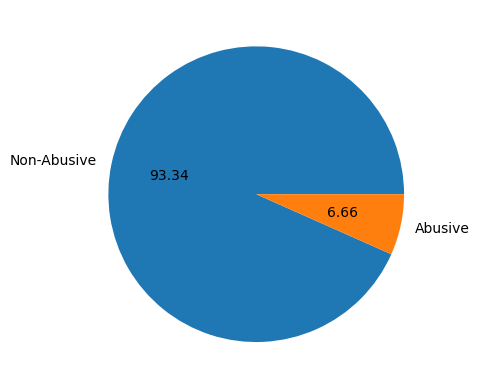

In [18]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['Non-Abusive' , 'Abusive'],autopct="%0.2f")
plt.show()

+ **Data is Imbalanced**

In [19]:
import nltk


In [20]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['text'].apply(len)


0         220
1           8
2         612
3         505
4         203
         ... 
47974    1523
47975    1126
47977     892
47980     932
47981    4289
Name: text, Length: 24656, dtype: int64

In [22]:
df['num_characters'] = df['text'].apply(len)


C:\Users\hp\AppData\Local\Temp\ipykernel_10420\3217166257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [23]:
df.head()


,text,target,num_characters
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220
1,fuck you,0,8
2,Gentlemen:\nThe following champagne is availab...,0,612
3,sorry i've taken so long...just been trying to...,0,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203


In [24]:
# Number of Words
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0         44
1          2
2         99
3        163
4         42
        ... 
47974    255
47975    244
47977    164
47980    189
47981    897
Name: text, Length: 24656, dtype: int64

In [25]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\hp\AppData\Local\Temp\ipykernel_10420\76344806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [26]:
df.head()

,text,target,num_characters,num_words
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44
1,fuck you,0,8,2
2,Gentlemen:\nThe following champagne is availab...,0,612,99
3,sorry i've taken so long...just been trying to...,0,505,163
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42


In [27]:
df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


0         1
1         1
2         6
3         8
4         2
         ..
47974    12
47975    12
47977     9
47980    10
47981    49
Name: text, Length: 24656, dtype: int64

In [28]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\hp\AppData\Local\Temp\ipykernel_10420\4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [29]:
df.head()


,text,target,num_characters,num_words,num_sentences
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1
1,fuck you,0,8,2,1
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6
3,sorry i've taken so long...just been trying to...,0,505,163,8
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2


In [30]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,24656.000000,24656.000000,24656.000000
mean,1798.708306,340.321017,12.479031
std,5394.644531,818.334355,26.660055
min,1.000000,1.000000,1.000000
25%,264.000000,51.000000,3.000000
50%,729.000000,142.000000,6.000000
75%,1748.000000,344.000000,13.000000
max,272036.000000,32337.000000,1084.000000


In [31]:
## Analyze Abusive and Non-Abusive separately

In [32]:
#Abusive

df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1642.000000,1642.000000,1642.000000
mean,1690.338002,342.696102,16.905603
std,2834.633786,590.600439,32.147667
min,5.000000,1.000000,1.000000
25%,183.000000,40.250000,3.000000
50%,597.500000,123.000000,6.000000
75%,2121.000000,434.750000,19.000000
max,35528.000000,7112.000000,339.000000


In [33]:
#Non-Abusive

df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,23014.000000,23014.000000,23014.000000
mean,1806.440297,340.151560,12.163205
std,5532.160062,832.213721,26.196939
min,1.000000,1.000000,1.000000
25%,271.000000,51.000000,3.000000
50%,737.500000,143.000000,6.000000
75%,1728.000000,339.000000,13.000000
max,272036.000000,32337.000000,1084.000000


In [34]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.005366,-0.000775,-0.044351
num_characters,0.005366,1.000000,0.834616,0.693007
num_words,-0.000775,0.834616,1.000000,0.839423
num_sentences,-0.044351,0.693007,0.839423,1.000000


In [35]:
import seaborn as sns 

<AxesSubplot:>

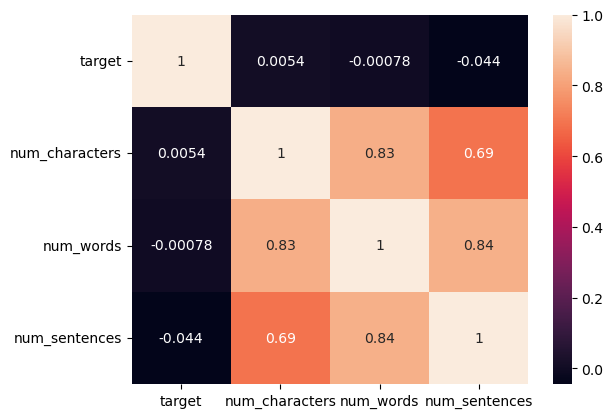

In [36]:
sns.heatmap(df.corr(), annot=True)

## Data Preprocessing

+ **Lower Case**
+ **Tokenization**
+ **Removing stop words and punctuation**
+ **Stemming**

In [37]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    return text()

In [38]:
#Removing Special Characters

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():         #is_al_num=is alpha numeric
            y.append(i)
            
    return y

In [39]:
transform_text('Hi How Are you 20% @ 50')

['hi', 'how', 'are', 'you', '20', '50']

+ As you can see we have removed special characters

In [40]:
#STOPWORDS
from nltk.corpus import stopwords
stopwords.words('english') 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
#PUNCTUATION
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():        
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation :
            y.append(i)
    return y

In [43]:
df['text'][5000]

"\n\n_____________________DAVID COURSEY_____________________\n\nSHOWDOWN: SUN, MS SQUARE OFF OVER WEB SERVICES\n\n    Next week brings us a pair of dueling conferences,\n         as Microsoft and Sun try to woo folks into following\n         their visions for Web services. But is calling\n         the competition a battle a fair assessment,\n         when MS is already so far ahead?\n\nhttp://cgi.zdnet.com/slink?/adeskb/adt1019/2818447:8593142\n\n   PLUS: DON'T MISS WINDOWS XP WEEK ON ANCHORDESK!\n\nhttp://cgi.zdnet.com/slink?/adeskb/adt1019/2818519:8593142\n\n#\n\n\n_____________________NEWS ANALYSIS_____________________\n\nPatrick Houston\n\n    NANOTECHNOLOGY: INSIDE THE 'SINGLE MOLECULE' TRANSISTOR\n\n    Death and taxes aren't life's only inevitabilities\n    after all. There's another: miniaturization.\n    Latest example comes from Bell Labs,\n    which unveiled a carbon transistor\n    thousands of times smaller than those\n    now inside a Pentium 4.\n\n     PLUS:\n\n     DRIN

In [44]:
#Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('feeling')

'feel'

In [45]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():        
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation :
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [46]:
df['text'].apply(transform_text)

0        eat shit john j lavorato excelr pm john ect cc...
1                                                     fuck
2        gentlemen follow champagn avail 70 approxim re...
3        sorri taken long tri fend chick life sooooo ha...
4        asshol john j lavorato excelr john ect cc subj...
                               ...                        
47974    need new lead busi need increas internet expos...
47975    imag imag imag garth brook wrap imag imag win ...
47977    imag imag imag dear smartremind member imag fr...
47980    imag imag imag imag kid rock forev imag offici...
47981    receiv regist e trade web site one partner sit...
Name: text, Length: 24656, dtype: object

In [47]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\hp\AppData\Local\Temp\ipykernel_10420\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [48]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1,eat shit john j lavorato excelr pm john ect cc...
1,fuck you,0,8,2,1,fuck
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6,gentlemen follow champagn avail 70 approxim re...
3,sorry i've taken so long...just been trying to...,0,505,163,8,sorri taken long tri fend chick life sooooo ha...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2,asshol john j lavorato excelr john ect cc subj...


In [49]:
# Creating WordCloud
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,
               min_font_size=10,
               background_color='white',
               max_words=100)

In [50]:
NonAbusive_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

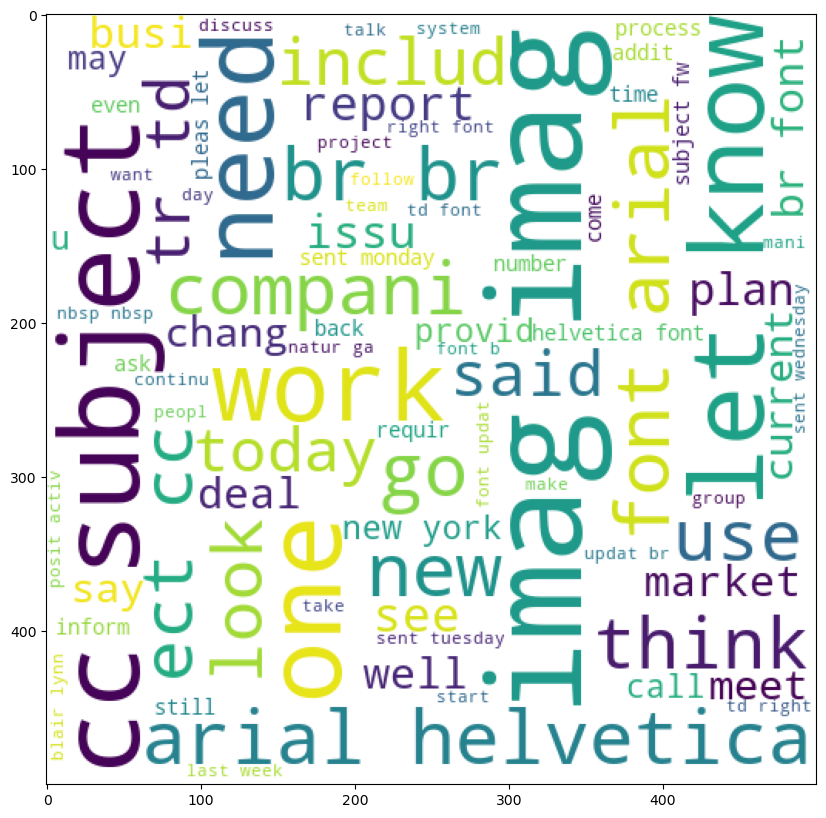

In [51]:
plt.figure(figsize=(20,10))
plt.imshow(NonAbusive_wc)

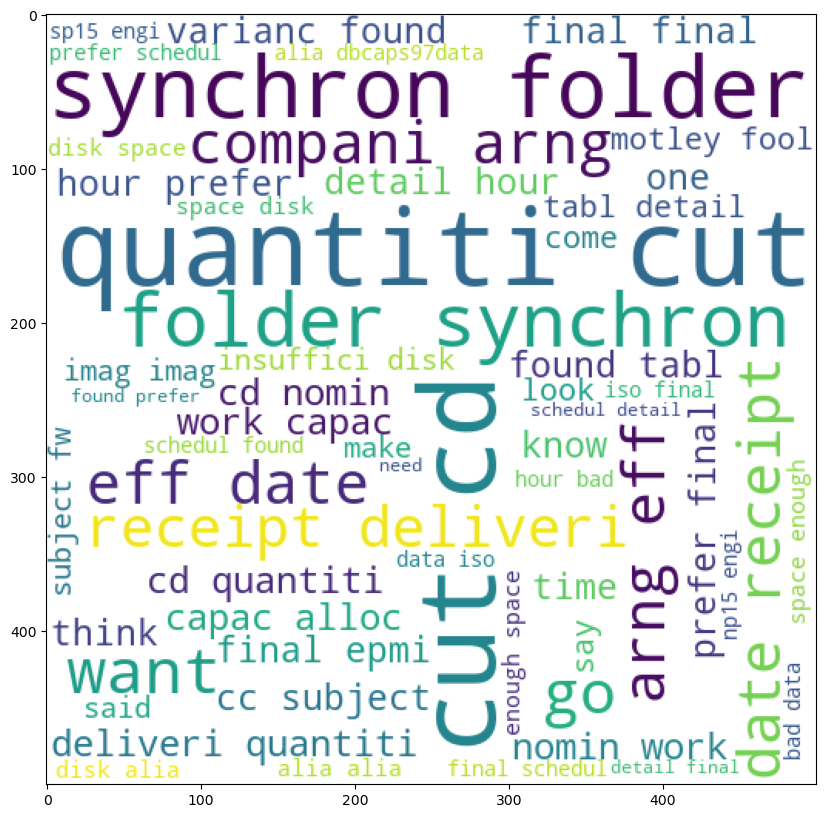

In [52]:
Abusive_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(Abusive_wc)

In [53]:
NonAbusive_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        NonAbusive_corpus.append(word)

In [54]:
len(NonAbusive_corpus)

3208449

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


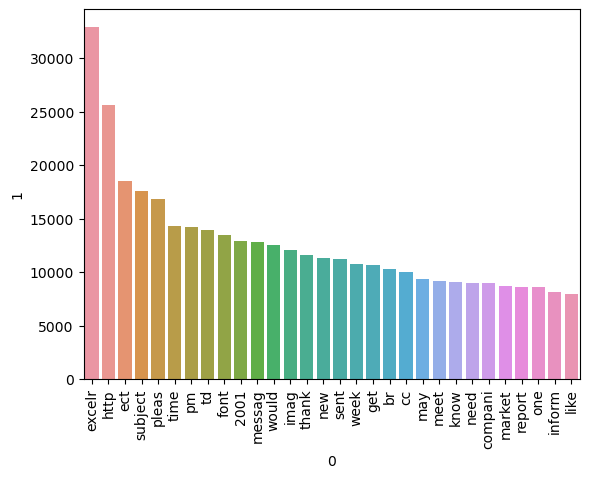

In [59]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(NonAbusive_corpus).most_common(30))[0],pd.DataFrame(Counter(NonAbusive_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [60]:
Abusive_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        Abusive_corpus.append(word)

In [61]:
len(Abusive_corpus)

208405

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


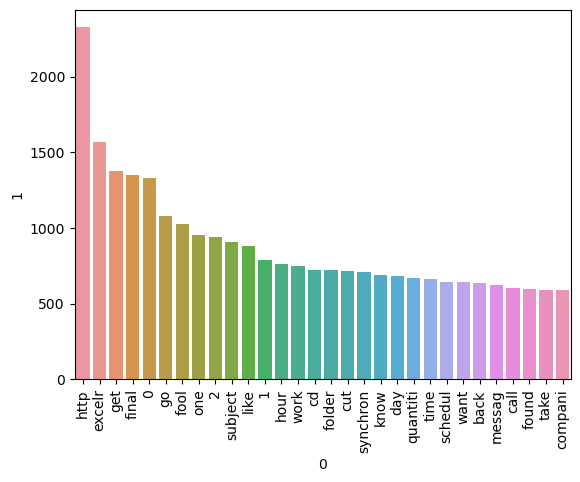

In [62]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(Abusive_corpus).most_common(30))[0],pd.DataFrame(Counter(Abusive_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Balancing Data Using Tfid Vectorization

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2550)

In [64]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [65]:
X.shape

(24656, 2550)

In [66]:
y = df['target'].values

# Model Building

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

As our data is imbalaced we will be looking for good precision score 

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7968369829683698
[[ 260   70]
 [ 932 3670]]
0.9812834224598931


In [71]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9568126520681265
[[ 171  159]
 [  54 4548]]
0.9662205226258763


In [72]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.813463098134631
[[ 287   43]
 [ 877 3725]]
0.988588110403397


+ Here we can see GNB and BNB are giving good precision score but there accuracy is also low compared to MNB

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [74]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [75]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc,  
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [76]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [77]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9738442822384428
Precision -  0.977782525101474
For  KN
Accuracy -  0.9519464720194647
Precision -  0.953647890251507
For  NB
Accuracy -  0.9568126520681265
Precision -  0.9662205226258763
For  DT
Accuracy -  0.9525547445255474
Precision -  0.9540540540540541
For  LR
Accuracy -  0.9750608272506083
Precision -  0.9767936981051735
For  RF
Accuracy -  0.9724249797242498
Precision -  0.973093220338983
For  AdaBoost
Accuracy -  0.9602595296025953
Precision -  0.9659475465313029
For  ETC
Accuracy -  0.971816707218167
Precision -  0.9728756092392457
For  GBDT
Accuracy -  0.9641119221411192
Precision -  0.9641283826305853
For  xgb
Accuracy -  0.9716139497161395
Precision -  0.9734719864176571


In [78]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [79]:
performance_df


,Algorithm,Accuracy,Precision
0,SVC,0.973844,0.977783
4,LR,0.975061,0.976794
9,xgb,0.971614,0.973472
5,RF,0.972425,0.973093
7,ETC,0.971817,0.972876
2,NB,0.956813,0.966221
6,AdaBoost,0.960260,0.965948
8,GBDT,0.964112,0.964128
3,DT,0.952555,0.954054
1,KN,0.951946,0.953648


In [80]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


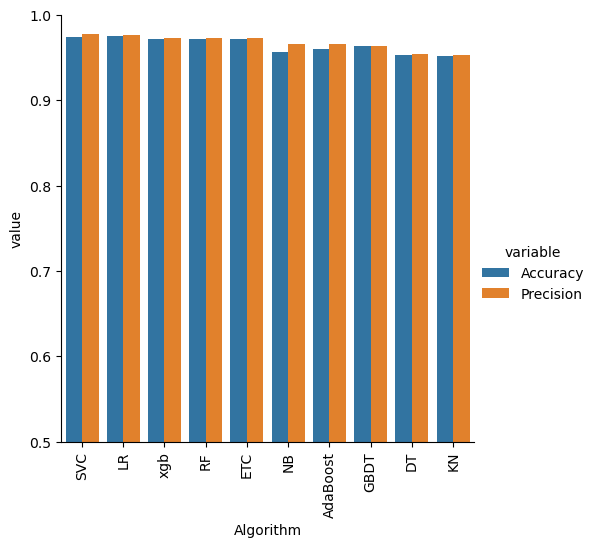

In [81]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [82]:
import pickle 

In [83]:
pickle.dump(clf,open('model.pkl','wb'))   #write binary

In [84]:
pickled_model = pickle.load(open('model.pkl', 'rb'))     #read binary
pickled_model.predict(X_test)
import pickle

pickle.dump(clf, open('vectorizer.pkl', 'wb'))
pickled_model = pickle.load(open('vectorizer.pkl', 'rb'))
pickled_model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])